List the poorest and richest countries worldwide

The values of numerical variables are numbers. They can be described by measures of central tendency, or the most typical value in a dataset, and dispersion, which represents the spread of a distribution.

In the next few exercises, you will use these statistics to explore the data in 'per_capita_income.csv', which contains the average income earned per person in a given country. The first step in analyzing aspects of the global income distribution is to inspect and familiarize yourself with the data.

In [1]:
import pandas as pd

# Import the data
income = pd.read_csv('per_capita_income.csv')

# Inspect the result
income.info()

# Sort the data by income
income = income.sort_values('Income per Capita', ascending=False)

# Display the first and last five rows
print(income.head())
print(income.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            184 non-null    object 
 1   Income per Capita  184 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB
               Country  Income per Capita
133              Qatar       141542.66280
97    Macao SAR, China       111496.62940
96          Luxembourg       102051.68030
144          Singapore        85382.30227
23   Brunei Darussalam        78369.29102
                      Country  Income per Capita
121                     Niger         955.483324
94                    Liberia         835.366935
37           Congo, Dem. Rep.         784.365232
26                    Burundi         727.150789
31   Central African Republic         618.752859


Global incomes: Central tendency

The most common measures of central tendency are the mean, which is equal to the sum of all values divided by the total number of values, median, which separates the upper half of data from the lower half, and mode, which is the most frequent value in the data set. The pandas package contains functions that can calculate each of these.

In this data set, the values for 'Income per Capita' are floats, and there are no repeat values, so running income['Income per Capita'].mode() in your console returns an empty series. Here, you will use the floor division operator // to add a new column that measures income in thousands, rounded down, so that a value such as 11,543.43 becomes just 11. Then, you will run the above functions to better understand how incomes are distributed.

In [12]:
# Calculate the mean
mean = income['Income per Capita'].mean()
print("Mean=", mean)

# Calculate the median
print("Median=",income['Income per Capita'].median())

# Create the new column
income['Income per Capita (,000)'] = income['Income per Capita'] // 1000

# Calculate the mode of the new column
print("Mode=",income['Income per Capita (,000)'].mode())

Mean= 19469.41956573696
Median= 11620.932519999998
Mode= 0    1.0
dtype: float64


Rounded down to the nearest thousand, the most common value in Income per Capita is 1.0.

Global incomes: Dispersion
    
A quantile is a measure of dispersion created by dividing a frequency distribution of a DataFrame into even groups. You can return values at the given quantile q of a DataFrame df with the command df.quantile(q); likewise, supplying a list as q will return a value for each given quantile.

Here, you will continue your analysis of global income distribution using two measures of dispersion: the standard deviation, or square root of variance, and the interquartile range (IQR).

In [13]:
# Calculate standard deviation
std = income['Income per Capita'].std()

# Calculate and print lower and upper bounds
bounds = [mean-std, mean+std]
print(bounds)

# Calculate and print first and third quartiles
quantiles = income['Income per Capita'].quantile([.25, .75])
print(quantiles)

# Calculate and print IQR
iqr = quantiles[.75] - quantiles[.25]
print(iqr)

[-2497.4416414691186, 41436.280772943035]
0.25     3922.35894
0.75    26558.75467
Name: Income per Capita, dtype: float64
22636.39573


Deciles of the global income distribution

A decile is a special kind of quantile obtained by dividing the distribution of a particular dataset by ten. Deciles (as well as any other kind of quantile) can be created by supplying the following numpy function to .quantile(), where start is the beginning of the interval (inclusive), stop is the end of the interval (exclusive), and step is the spacing between any two adjacent values:

np.arange(start, stop, step)

A standard bar graph is a great way to visualize the distribution of data. You can create one by adding kind='bar' as an argument to .plot().

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
0.1     1805.906426
0.2     3177.255688
0.3     5506.323195
0.4     8510.729683
0.5    11620.932520
0.6    15790.369076
0.7    22563.075646
0.8    32517.693902
0.9    47377.886804
Name: Income per Capita, dtype: float64


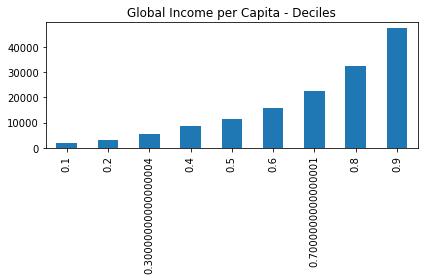

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Generate range of deciles
quantiles = np.arange(start=0.1, stop=0.91, step=0.1)

# Print them
print(quantiles)

# Calculate deciles for 'Income per Capita'
deciles = income['Income per Capita'].quantile(quantiles)

# Print them
print(deciles)

# Plot deciles as a bar chart
deciles.plot(kind='bar', title='Global Income per Capita - Deciles')


# Make sure to use the tight layout!
plt.tight_layout()

# Show the plot
plt.show()

As expected, the height difference between any two adjacent bars is the same!

Getting all the statistics

You can retrieve all major central tendency, dispersion, and shape statistics of a distribution at once with the pandas .describe() method.

In [15]:
income['Income per Capita'].describe()

count       184.000000
mean      19469.419566
std       21966.861207
min         618.752859
25%        3922.358940
50%       11620.932520
75%       26558.754670
max      141542.662800
Name: Income per Capita, dtype: float64

Visualizing international income distribution

seaborn is a Python visualization library for statistical data visualization based on matplotlib.

By default, the distplot() function in the seaborn package creates a histogram, where data is grouped into ranges and and plotted as bars, and fits a kernel density estimation (KDE), or smoothed histogram. You can also use distplot() to create another kind of graph called a rugplot, which adds markers at the bottom of the chart to indicate the density of observations along the x axis.

seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, ...)

In previous exercises, you created a quantile plot which provided a fairly granular sense of the level of income per capita at different points of the distribution. Here, you will use distplot() to get the full picture!

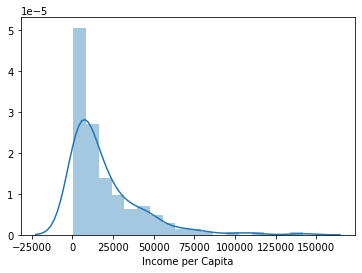

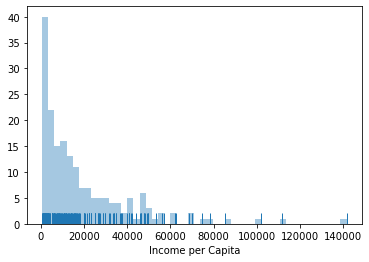

In [18]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a basic histogram of income per capita
sns.distplot(income['Income per Capita'])

# Show the plot
plt.show()

# Plot a rugplot
sns.distplot(income['Income per Capita'], bins=50, kde=False, rug=True)

# Show the plot
plt.show()

Highlighting values in the distribution

Sometimes it is necessary to manipulate your data in order to create a better visualization. Two methods that can take care of missing values are .dropna() and .fillna(). You can also remove outliers by filtering entries that are over or under a certain percentile by applying a condition using .quantile() to a particular column

In this exercise, you will take a final look at global income distribution, and then remove outliers above the 95th percentile, plot the distribution, and highlight both the mean and median values. 

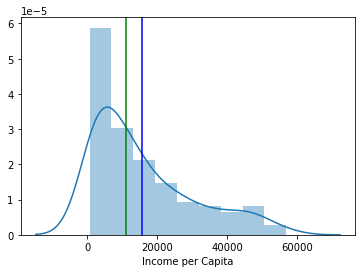

In [19]:
# Create inc_per_capita
inc_per_capita = income['Income per Capita']

# Filter out incomes above the 95th percentile
inc_per_capita = inc_per_capita[inc_per_capita < inc_per_capita.quantile(0.95)]

# Plot histogram and assign to ax
ax = sns.distplot(inc_per_capita)

# Highlight mean
ax.axvline(inc_per_capita.mean(), color='b')

# Highlight median
ax.axvline(inc_per_capita.median(), color='g')

# Show the plot
plt.show()